## Demo
Rosenbaum's test implementation.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import networkx as nx
import pandas as pd
import sys
sys.path.append("..")
from rosenbaum import *
import matplotlib.pyplot as plt

will use the CPU to calculate the distance matrix.
will use the CPU to calculate the distance matrix.
will use the CPU to calculate the distance matrix.


In [3]:
help(rosenbaum)

Help on function rosenbaum in module rosenbaum.rosenbaum:

rosenbaum(adata, group_by, test_group, reference='rest', metric='mahalanobis', rank=False, k=None, nx=False)
    Perform Rosenbaum's matching-based test for checking the association between two groups 
    using a distance-based matching approach.
    
    Parameters:
    -----------
    data : anndata.AnnData or pd.DataFrame
        The input data containing the samples and their respective features. If the input is an
        `AnnData` object, the samples and their corresponding features should be stored in `data.X` and the
        group labels in `data.obs[group_by]`. If using a `pandas.DataFrame`, the group labels should be in the
        column specified by `group_by`, and the feature matrix should be the remaining columns.
    
    group_by : str
        The column in `data.obs` or `data` (in case of a `pandas.DataFrame`) containing the group labels.
        The values of this column should include the `test_group` and po

In [22]:
samples_A = [np.random.normal(0, 1, 2) for _ in range(1000)]
samples_B = [np.random.normal(0, 1, 2) for _ in range(1000)]
samples_C = [np.random.normal(5, 1, 2) for _ in range(11)]

groups = ["A"] * 1000 + ["B"] * 1000 # + ["C"] * 11
samples = np.array(samples_A + samples_B) # + samples_C)
adata = ad.AnnData(samples)
adata.obs["Group"] = groups

In [23]:
sc.pp.pca(adata)
sc.pp.neighbors(adata, n_neighbors=5, metric="sqeuclidean")

In [25]:
(p_val, z, support), nx_matching, nx_G  = rosenbaum(adata, group_by="Group", test_group="A", reference="B", k=2, nx=True)
print("P-value", p_val, "Z-score", z, "Relative support", support)

will use the CPU to calculate the distance matrix.
Original group counts:
Filtered and downsampled samples:
Group
A    1000
B    1000
Name: count, dtype: int64
matching samples.
calculating PCA and kNN graph.
extracting connectivities.
assembling edges


/data/bionets/je30bery/conda/envs/graphtool/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


counting cross matches
P-value 0.4932598471707642 Z-score -0.08587408424426694 Relative support 0.84


In [26]:
(p_val, z, support), gt_matching, gt_G = rosenbaum(adata, group_by="Group", test_group="A", reference="B", k=2, nx=False)
print("P-value", p_val, "Z-score", z, "Relative support", support)

Original group counts:
Filtered and downsampled samples:
Group
A    1000
B    1000
Name: count, dtype: int64
matching samples.
calculating PCA and kNN graph.


/data/bionets/je30bery/conda/envs/graphtool/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


extracting connectivities.
assembling edges


2000it [00:00, 13890.29it/s]


counting cross matches
P-value 0.4932598471707642 Z-score -0.08587408424426694 Relative support 0.84


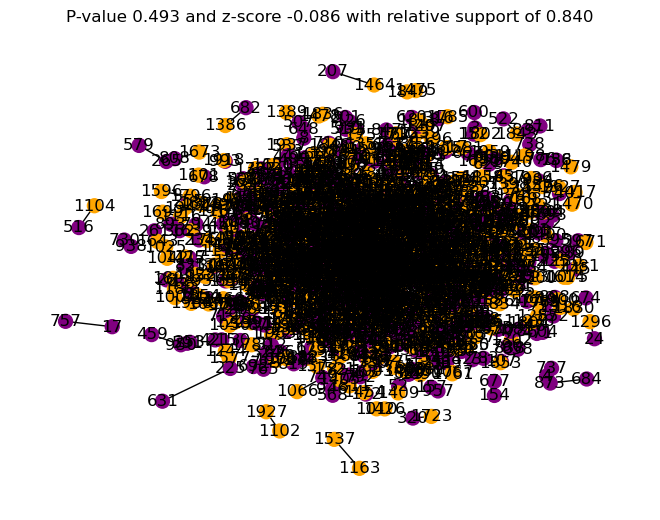

In [30]:
used_elements = list(chain.from_iterable(nx_matching))
G = nx.Graph()
G.add_edges_from(nx_matching)
pos = {i: samples[i] for i in used_elements}
labels = {i: i for i in used_elements}
colors = adata.obs["Group"].replace({"A": "purple", "B": "orange"}).values[used_elements]
nx.draw(G, pos=pos, node_color=colors, labels=labels, node_size=100)
plt.title(f"P-value {p_val:.3f} and z-score {z:.3f} with relative support of {support:.3f}")
plt.show()

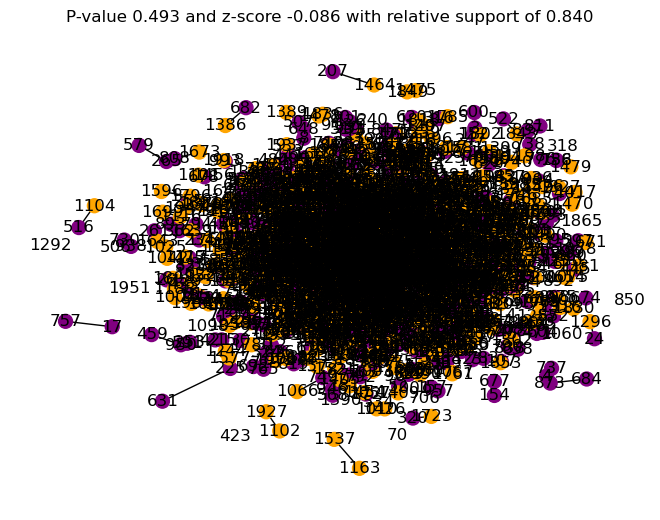

In [31]:
used_elements = list(chain.from_iterable(gt_matching))
G = nx.Graph()
G.add_edges_from(gt_matching)
pos = {i: samples[i] for i in range(len(samples))}
labels = {i: i for i in range(len(samples))}
colors = adata.obs["Group"].replace({"A": "purple", "B": "orange"}).values[used_elements]
nx.draw(G, pos=pos, node_color=colors, labels=labels, node_size=100)
plt.title(f"P-value {p_val:.3f} and z-score {z:.3f} with relative support of {support:.3f}")
plt.show()

In [20]:
sorted(nx_matching, key= lambda x: x[0]) == sorted(gt_matching, key= lambda x: x[0])

True